# Volcano plot

A Volcano plot is a simple point graph where the x-axis is the log fold change of a gene and y-axis is the - log10 of the p-values. Each point represents one gene.

For this assignment we will take a normalized matrix where the first column is the gene id and the remaining 6 columns are different samples. The next three columns represent samples grown in control conditions and the last three columns are grown under a specific condition. For each gene, we will calculate the log fold change and the p-value, using T-test, and create a volcano plot.

We often use a criteria that if a gene has a p-value < 0.05 and the absolute value of log2 fold change is greater than 1, than we say the gene is differentially expressed.

### Q 1: Load the expvalues.txt using pandas.

##### Save it as a variable called **data**. Note that the file is space delimited.

In [1]:
import pandas as pd
data = pd.read_csv("expvalues.txt", delim_whitespace=True, header=0, \
                   names=['Id','Control1','Control2','Control3', 'Treatment1','Treatment2','Treatment3'])

### Q 2: Calculate p-value

Using the **test_ind** function in scipy.stats library to calculate the p-value for each gene. Assume that variance is equal and save just the p-value in an array called **pvalues**.


In [2]:
from scipy.stats import ttest_ind

pvalues = [ttest_ind(data.iloc[i, 1:4], data.iloc[i, 4:7]).pvalue for i in range(data.shape[0])]

### Q 3: Calculate log fold change

To calculate log2 of the fold change for each gene, first calculate the average of the three control values and also the average of the three treatment values. Then divide the treatment mean with the control mean. This is your fold change. Now take the log2 of this to calculate the log2 fold change.

Save the results as an np array called **lfc**

Note that the log2 and the mean methods are available in the numpy library.

In [3]:
from numpy import mean, log2

lfc = log2([mean(data.iloc[i, 4:7]) / mean(data.iloc[i, 1:4]) for i in range(data.shape[0])])

### Q 4: Calculate -log10 of the p-value

For plotting purpose it is much easier to visualize the data once we tranform the p-value but first taking the log10 of the p-value and then multiplying it with -1. This will give us a large number when the p-value is small.

Save the -log10(pvalue) to an np.array called **neg_log_pvalue**



In [4]:
from numpy import log10

neg_log_pvalue = -1 * log10(pvalues)

### Q 5: Determing genes that are significantly differentially expressed.

Create an np array called **sig** where the value is 1 if the gene is significant and 0 if not. 

A gene is considered sig if the absolute value of lfc of the gene is greater than 1 AND pvalue of that gene is < 0.05

If the criteria is not met, than set the value to 0.

In [5]:
import numpy as np

sig = []
for l, p in zip(np.abs(lfc), pvalues):
    if (l>1 and p<0.05):
        sig.append(1)
    else:
        sig.append(0)

### Q 6: Add the vectors to the data dataframe

Add **pvalue**, **neg_log_pvalue**, **lfc**, and **sig** to the **data** dataframe.

In [6]:
# create dataframe with pvalues, neg_log_pvalue, lfc, sig variables and set columns
df = pd.DataFrame([pvalues, neg_log_pvalue, lfc, sig]).T
df.columns = ['pvalues', 'neg_log_pvalue', 'lfc', 'sig']

# concatenate the df dataframe with data dataframe
data = pd.concat([data, df], axis=1)

### Q 7: Create the volcano plot

Use the scatterplot in seaborn library setting the lfc as the x-axis, the neg_log_pvalue as the y-axis and color the point based on whether they are significant. 

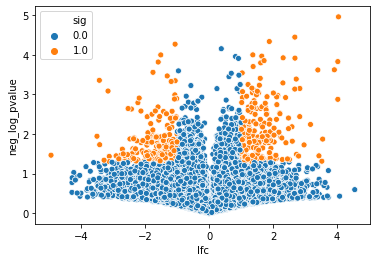

In [8]:
import seaborn as sns

ax = sns.scatterplot(x = "lfc", y = "neg_log_pvalue", hue = "sig", data = data)